### Binom Example 

[1] 0.0768

[1] 0.0768

x,prob.x
0,0.0102
1,0.0768
2,0.2304
3,0.3456
4,0.2592
5,0.0778


[1] 3 2 4 1 3 1 3 3 3 4

[1] 2.991

[1] 1.236155

[1] 1.111825

x
  0   1   2   3   4   5 
 12  84 215 362 244  83 

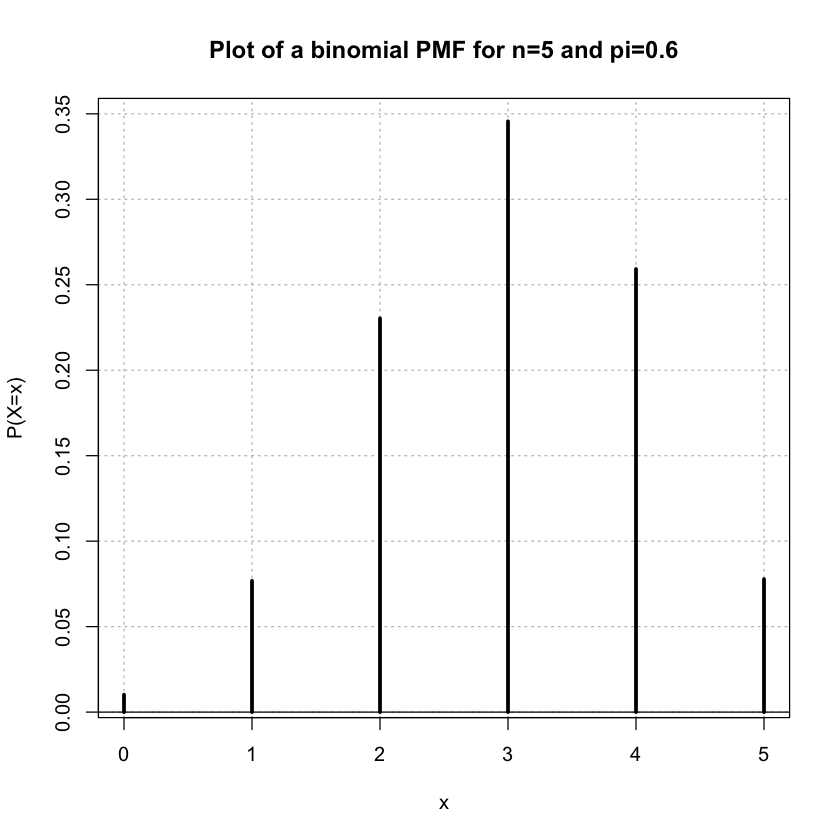

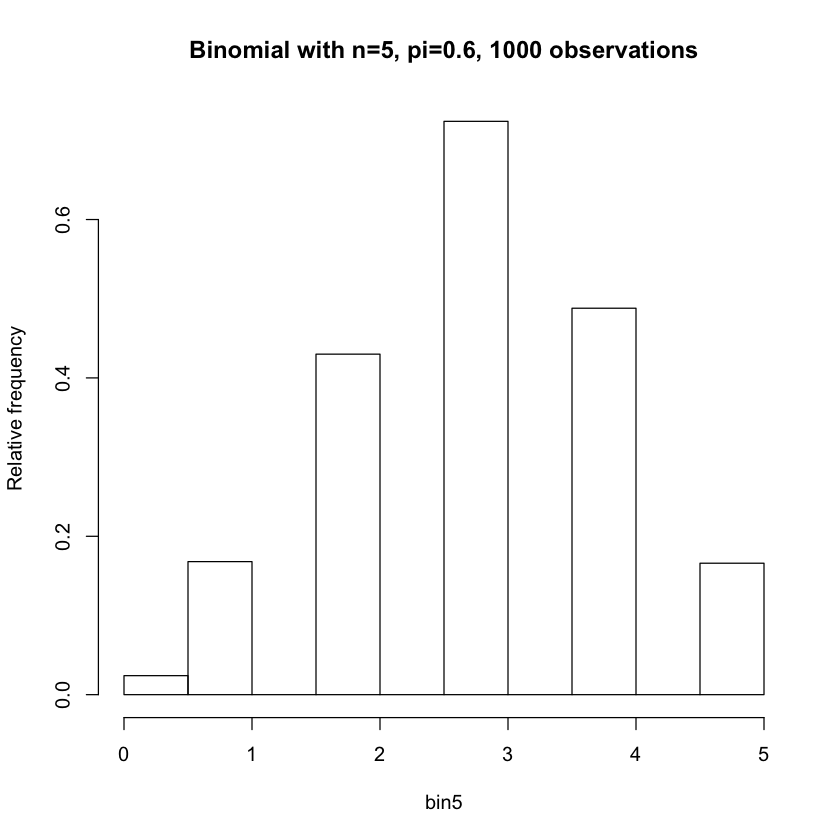

bin5
  0   1   2   3   4   5 
 12  84 215 362 244  83 

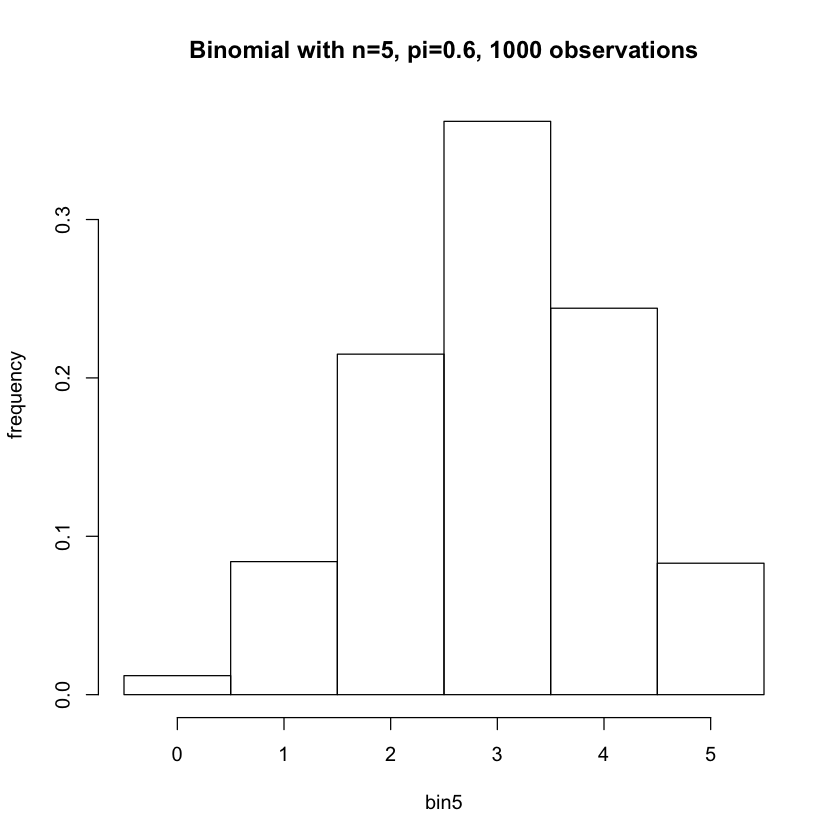

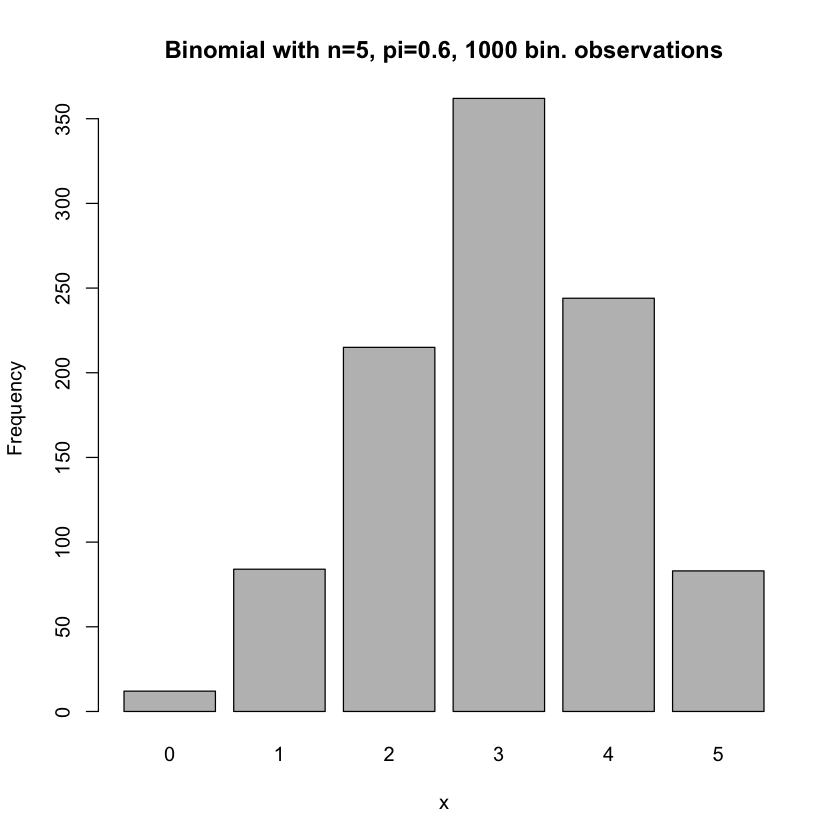

In [1]:
# Binomial example, KTH modification of Binomial.R
# binomial density
# Individual terms:e.g. P(X=1|X~B(n=5,p=0.6))
dbinom(x = 1, size = 5, prob = 0.6) #binomial probability of 1 success, n=5 trials, and the probability is 0.6
dbinom(1,5,.6)
#
# Density table for B(n=5,p=0.6)
pmf<-dbinom(x=0:5,size=5,prob=0.6) #table showing binomial probabilities of 0-5 successes 
save <- data.frame(x=0:5,prob.x=round(pmf,digits=4))
save
#
# Probability plot
plot(save$x,y=save$prob.x,type="h",xlab="x",ylab="P(X=x)",
     main="Plot of a binomial PMF for n=5 and pi=0.6",
     panel.first=grid(col="gray",lty="dotted"),lwd=3)
abline(h=0)
#
# Simulate observations from a Binomial distribution
set.seed(4848)
bin5<-rbinom(n = 1000, size = 5, prob = 0.6)
bin5[1:10]

mean(bin5)
var(bin5)
sd(bin5)
# Frequency distribution
table(x = bin5) 
# 
# Relative frequency histogram
hist(bin5, main = "Binomial with n=5, pi=0.6, 1000 observations", 
     probability = TRUE, ylab = "Relative frequency")  
# Far left bar is not drawn correctly using the default breaks
#
# Alternative plot specifies the breaks
hist(bin5, main = "Binomial with n=5, pi=0.6, 1000 observations", 
     probability = TRUE, breaks = c(-0.5:5.5), ylab = "Relative 
     frequency")
#  
# Better plot: Bars are separated
save.count<-table(bin5)
save.count
barplot(height = save.count, names = c("0", "1", "2", "3", "4", "5"), 
        main = "Binomial with n=5, pi=0.6, 1000 bin. observations", 
        xlab = "x", ylab = "Frequency")

### Likelihood Function 

[1] 0.00000000 0.04286875 0.07290000 0.09211875 0.10240000 0.10546875
 [7] 0.10290000 0.09611875 0.08640000 0.07486875 0.06250000 0.05011875
[13] 0.03840000 0.02786875 0.01890000 0.01171875 0.00640000 0.00286875
[19] 0.00090000 0.00011875 0.00000000

[1] 0.25

,pi,lik
6,0.25,1


[1] -2.249341

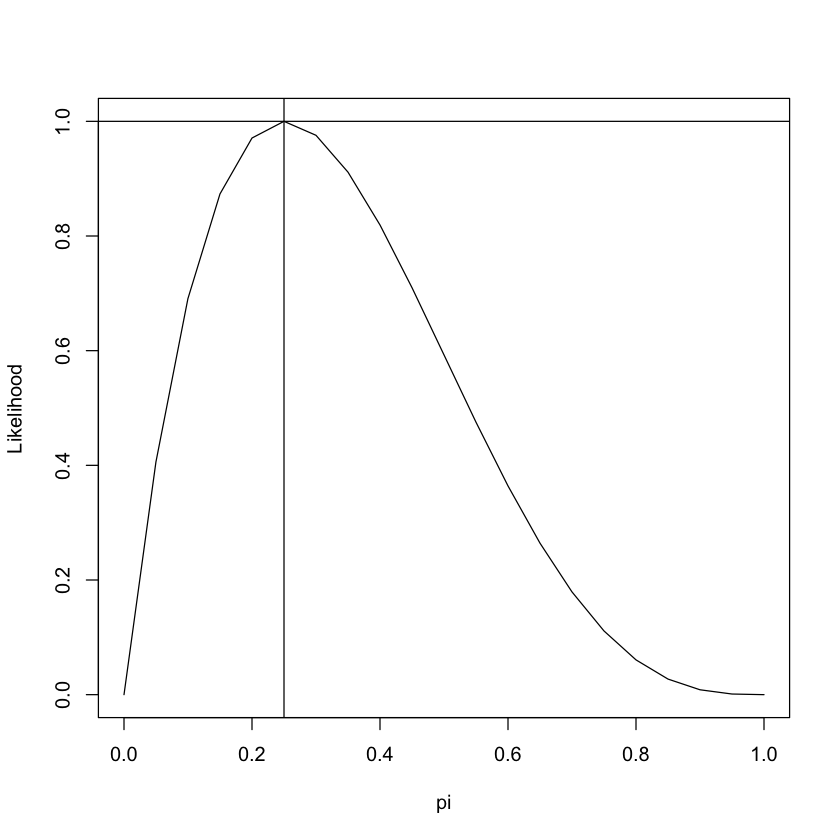

[1] 0.25

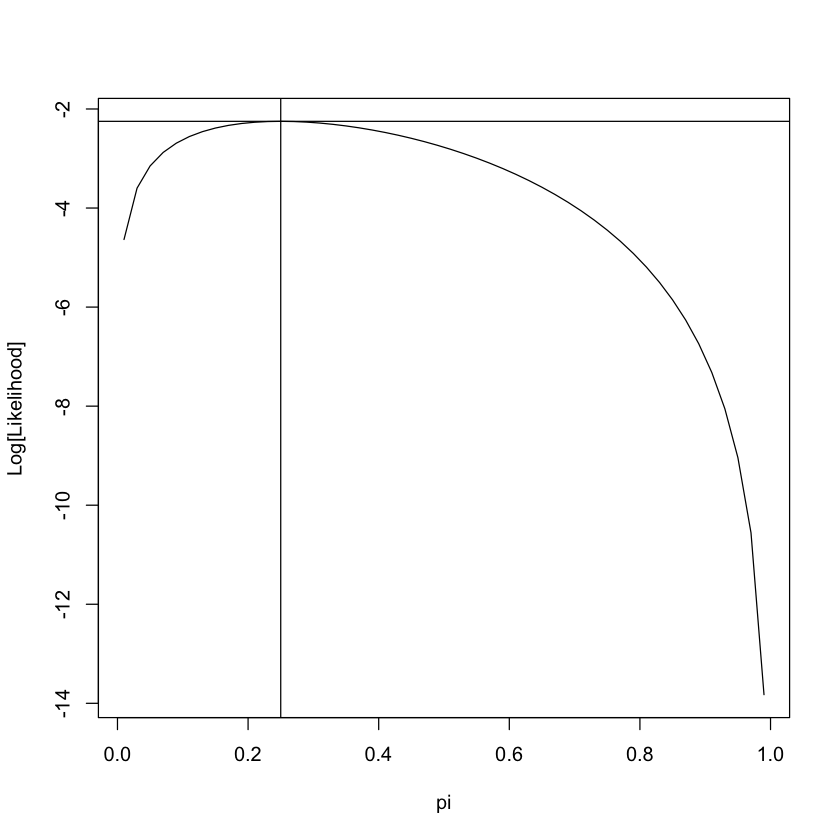

In [2]:
# Plot likelihood function for Binom(n=4,p=?)
#
# Observe 3 failures and 1 success  then L(pi|x)=(1-pi)^3*pi.1  
par(mfrow=c(1,1))
pi=seq(0,1,by=.05) #these are the values used on the horizontal axis
lik=(1-pi)^3*pi
lik
top=max(lik)
lik=lik/top #This rescales the vertical axis so maximum is 1.
plot(pi, lik, xlab="pi", ylab="Likelihood", type="l")
abline(v=1/4) #find max(lik) from calculus
abline(h=1.0)

# find approximate max(lik) in R
newx <- pi[which(lik > 0.999)]
newx
#also try
all <- data.frame(pi, lik)
atMax <- max(all$lik) == all$lik 
all[ atMax, ] 

# note that the data are discrete, if 0.25 is not one of the values of pi,
# we can't observe a value of exactly 0.25 for the maximum.

# The log[likelihood] maximizes at the same value of pi as the likelihood 
# Here log[L(pi|x)]= ln(pi)+ 3*ln(1-pi)
# Note that the log function in R uses base e
pi= seq(0.01,0.99, length=50) # because ln(0) is infinity
lnlik=log(pi) + 3*log(1-pi)
topl=max(lnlik)
topl
plot(pi, lnlik, xlab="pi", ylab="Log[Likelihood]", type="l")
abline(v=1/4)
abline(h=topl)

# find approximate max(lik) in R
newx2 <- pi[which(lnlik > -2.25)]
newx2
# The log[likelihood] is more ueful when using calculus to find the maximum

In [3]:
# Basic computations (Agresti Example p. 9)
w<-400  # Sum(y_i) is number of successes
n<-893 # Number of trials
alpha<-0.05
pi.hat<-w/n # Observed proportion
pi.hat

# Wald C.I. (also called "asymptotic" CI)
var.wald<-pi.hat*(1-pi.hat)/n
lower<-pi.hat - qnorm(p = 1-alpha/2) * sqrt(var.wald)
upper<-pi.hat + qnorm(p = 1-alpha/2) * sqrt(var.wald)
round(data.frame(lower, upper), 4)

# More simply (alternate code):
round(pi.hat + qnorm(p = c(alpha/2, 1-alpha/2)) * sqrt(var.wald),4)

# Adjusted estimate of pi (required for Wilson interval);# see p.12 text
p.tilde<-(w + qnorm(p = 1-alpha/2)^2 /2) / (n + qnorm(p = 1-alpha/2)^2)
p.tilde

# Wilson C.I.; #based on Score test
round(p.tilde + qnorm(p = c(alpha/2, 1-alpha/2)) * sqrt(n) / (n+qnorm(p = 1-alpha/2)^2) 
      * sqrt(pi.hat*(1-pi.hat) + qnorm(p = 1-alpha/2)^2/(4*n)),4)

# Agresti-Coull C.I.
var.ac<-p.tilde*(1-p.tilde) / (n+qnorm(p = 1-alpha/2)^2)
round(p.tilde + qnorm(p = c(alpha/2, 1-alpha/2)) * sqrt(var.ac),4)

# Binom package
library(package = binom)

# Can just obtain one interval at a time and save into an object
# Agresti-Coull: 
save.ci<-binom.confint(x = w, n = n, conf.level = 1-alpha, methods = "ac")
save.ci
#
# Can obtain all intervals at once
binom.confint(x = w, n = n, conf.level = 1-alpha, 
              methods = c("ac","wilson","asymptotic"))

[1] 0.4479283

lower,upper
0.4153,0.4805


[1] 0.4153 0.4805

[1] 0.4481514

[1] 0.4156 0.4807

[1] 0.4156 0.4807

method,x,n,mean,lower,upper
agresti-coull,400,893,0.4479283,0.4156042,0.4806985


method,x,n,mean,lower,upper
agresti-coull,400,893,0.4479283,0.4156042,0.4806985
asymptotic,400,893,0.4479283,0.4153128,0.4805439
wilson,400,893,0.4479283,0.4156050,0.4806977
